In [11]:

Data=read.csv("C://change_to_your_path/TargetAnalysisTable.csv")   

head(Data)




ï..state,zcta5,ZIPName,County,pctcnty,Fipco,FipCo2,pctState,AltZIPs,NaltZIPs,...,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750,AVG_Totalprice
36,11937,Springs NY,Suffolk NY,1.000,36103,NA,1,,0,...,0.959,60,0.041,1868,0,960,0.650,1289,0.873,70.5217
36,11941,Eastport NY,Suffolk NY,1.000,36103,NA,1,,0,...,0.914,14,0.086,1210,0,92,0.564,149,0.914,23.6500
36,11940,East Moriches NY,Suffolk NY,1.000,36103,NA,1,,0,...,0.976,12,0.024,1694,0,206,0.420,479,0.976,262.0200
36,12062,East Nassau NY,Rensselaer NY,0.904,36083,36021,1,,0,...,0.919,12,0.081,795,874,22,0.149,93,0.628,10.0000
36,11942,East Quogue NY,Suffolk NY,1.000,36103,NA,1,,0,...,1.000,0,0.000,1979,0,31,0.419,68,0.919,69.0094
36,11944,Greenport NY,Suffolk NY,1.000,36103,NA,1,,0,...,0.929,48,0.071,1292,0,333,0.495,508,0.755,37.9557


,AVG_Totalprice,pctInCollege,pctChild,MedianAge,pctMales,pctWorkAtHome,pctAsian1,pctEmployedFemales,MedianEarnings
AVG_Totalprice,1.00,0.02,-0.03,0.00,0.01,0.04,0.04,0.00,0.07
pctInCollege,0.02,1.00,-0.48,-0.31,0.04,0.02,0.21,-0.02,-0.16
pctChild,-0.03,-0.48,1.00,-0.39,-0.07,-0.18,0.02,-0.10,0.11
MedianAge,0.00,-0.31,-0.39,1.00,-0.10,0.24,-0.17,0.21,0.23
pctMales,0.01,0.04,-0.07,-0.10,1.00,0.04,-0.01,-0.01,-0.06
pctWorkAtHome,0.04,0.02,-0.18,0.24,0.04,1.00,0.00,0.06,0.15


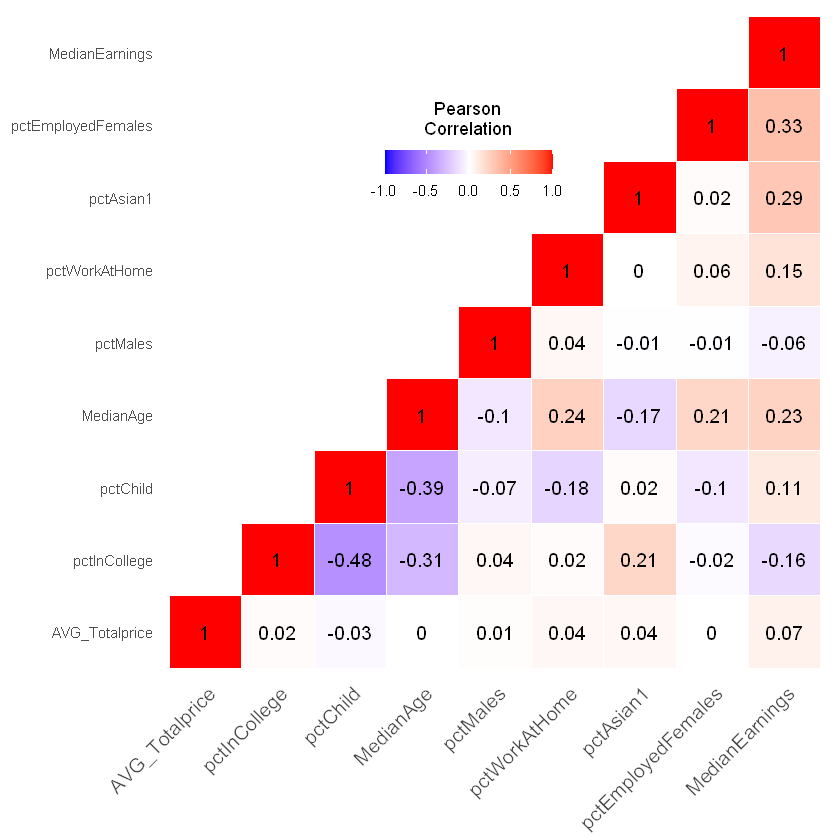

In [12]:

mydata <- Data[, c('AVG_Totalprice','pctInCollege','pctChild','MedianAge','pctMales','pctWorkAtHome','pctAsian1','pctEmployedFemales','MedianEarnings')]
#head(mydata)

cormat <- round(cor(na.omit(mydata)),2)
head(cormat)

# Get lower triangle of the correlation matrix
get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}


upper_tri <- get_upper_tri(cormat)

# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)


# Create a ggheatmap
library(ggplot2)
ggheatmap <- ggplot(melted_cormat, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ # minimal theme
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()
# Print the heatmap
# print(ggheatmap)

ggheatmap + 
  geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    panel.grid.major = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank(),
    axis.ticks = element_blank(),
    legend.justification = c(1, 0),
    legend.position = c(0.6, 0.7),
    legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                               title.position = "top", title.hjust = 0.5))